In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

## Data Cleaning

#### Understanding the 'companies.csv' file

In [2]:
companies = pd.read_csv('companies.csv', encoding='ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [5]:
# Making all the observations in permalink column upper case
companies['permalink'] = companies['permalink'].apply(lambda x: x.upper())

In [6]:
# Unique companies in companies file
companies['permalink'].nunique()

66368

#### Understanding the 'rounds.csv' file

In [7]:
rounds2 = pd.read_csv('rounds2.csv', encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [10]:
# Changing the name of the company_permalink colum to permalink and streamlining the objects of it
rounds2.rename(columns = {'company_permalink' : 'permalink'}, inplace=True)
rounds2['permalink'] = rounds2['permalink'].apply(lambda x: x.upper())

In [11]:
# Unique companies in rounds2 file
rounds2['permalink'].nunique()

66370

In [12]:
# Merging the 2 dataframes
master_frame = pd.merge(rounds2, companies, how = 'inner', on = 'permalink')
master_frame.shape

(114942, 15)

In [13]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [14]:
# Calculating the percentage of missing values in raised amount column
round(100*(master_frame['raised_amount_usd'].isnull().sum()/master_frame.shape[0]))

17.0

In [15]:
# Since the raised amount column is our target variable for further analysis, dropping the rows where null value is present
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]
master_frame.shape

(94958, 15)

count    8.441500e+04
mean     3.064266e+06
std      3.984641e+06
min      0.000000e+00
25%      2.500000e+05
50%      1.202600e+06
75%      4.500000e+06
max      1.700000e+07
Name: raised_amount_usd, dtype: float64

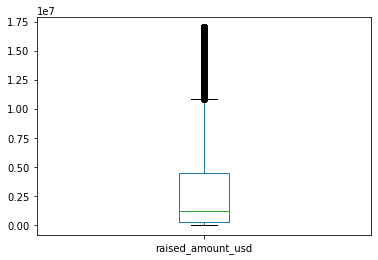

In [16]:
# Removing the outliers
Q1 = master_frame['raised_amount_usd'].quantile(0.25)
Q3 = master_frame['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1
master_frame = master_frame[~((master_frame['raised_amount_usd']<(Q1-1.5*IQR)) | (master_frame['raised_amount_usd']>(Q3+1.5*IQR)))]
master_frame['raised_amount_usd'].plot.box()
master_frame['raised_amount_usd'].describe()

## Funding Type Analysis

In [17]:
# Keeping only those observations which have venture,seed,angel & private equity as funding types
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'angel', 'private_equity'])]
master_frame.shape

(71276, 15)

In [18]:
# Analysing the 4 investment types
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4843.0,7.603801e+05,1.174901e+06,0.0,150000.0,400000.0,1000000.0,16837481.0
private_equity,911.0,5.806190e+06,4.743584e+06,0.0,1556566.0,5000000.0,10000000.0,17000000.0
seed,23582.0,6.773007e+05,1.003911e+06,0.0,55000.0,275000.0,1000000.0,16535302.0
venture,41940.0,4.986200e+06,4.439344e+06,0.0,1277153.5,3683793.5,7900000.0,17000000.0


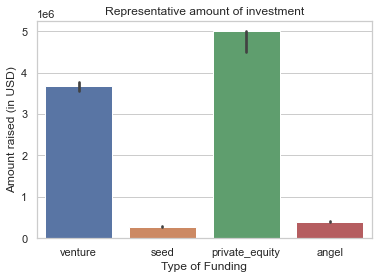

In [19]:
# Plotting the medians to decide which funding type is best for the company
sns.set(style='whitegrid')
sns.barplot(master_frame['funding_round_type'], master_frame['raised_amount_usd'], estimator=np.median)
plt.title('Representative amount of investment')
plt.xlabel('Type of Funding')
plt.ylabel('Amount raised (in USD)')
plt.show()

In [20]:
# Filtering the data based on the selected investment type
# Selecting 'private equity' as the preferred investment type because of its spread.
master_frame = master_frame[master_frame['funding_round_type'].isin(['private_equity'])]
master_frame.reset_index(inplace= True, drop = True)
master_frame.shape

(911, 15)

## Country Analysis

In [21]:
# Top 9 invested countries 
top9 = pd.DataFrame(master_frame.groupby('country_code', as_index=False)['raised_amount_usd'].sum().sort_values('raised_amount_usd',ascending=False).reset_index(drop=True))
top9 = top9.iloc[0:9, :]
top9

,country_code,raised_amount_usd
0,USA,3.875677e+09
1,GBR,2.131349e+08
2,CAN,1.800001e+08
3,ISR,1.415292e+08
4,BRA,6.657155e+07
5,AUS,5.726716e+07
6,RUS,5.400000e+07
7,NLD,4.775952e+07
8,IND,4.698205e+07


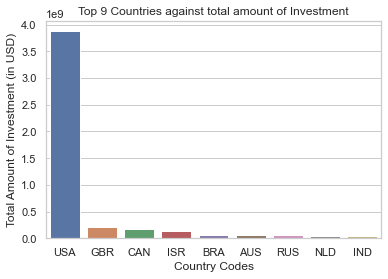

In [22]:
# Plotting the top 9 countries against total amount of investment
sns.barplot(top9['country_code'], top9['raised_amount_usd'])
plt.title('Top 9 Countries against total amount of Investment')
plt.xlabel('Country Codes')
plt.ylabel('Total Amount of Investment (in USD)')
plt.show()

## Sector Analysis 1

In [23]:
# Reading the mapping file
mapping = pd.read_csv('mapping.csv', encoding='ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [24]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [25]:
# Dropping the null observation from mapping
mapping = mapping[~mapping['category_list'].isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [26]:
mapping['Blanks'].value_counts()

0    687
Name: Blanks, dtype: int64

In [27]:
# Dropping the Blanks column from mapping
mapping = mapping.drop(columns = 'Blanks')
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [28]:
# Extracting the main sector from category_list column of the mapping file
mapping['Main Sector'] = mapping.apply(lambda x: mapping.columns[x==1][0], axis=1)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main Sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health


In [29]:
# Making all the observations in category_list lower case
mapping['category_list'] = mapping['category_list'].str.lower()

# Renaming the category_list column to primary_sector
mapping = mapping.rename(columns = {'category_list' : 'primary_sector'})

# Modifying the mapping file to contain only 2 columns: primary_sector and Main Sector
mapping = mapping.loc[:,['primary_sector', 'Main Sector']]
mapping.head()

,primary_sector,Main Sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


In [30]:
# Converting the dtype of category_list column of master_frame and making it lower case
master_frame['category_list'] = master_frame['category_list'].str.lower().astype('str')

# Extracting the primary sector from category_list column of master_frame
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,internet marketing
1,/ORGANIZATION/2DHEAT,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,NaN,24-10-2014,200708.0,2DHeat,http://www.2dheat.com/,clean technology,operating,GBR,P2,Warrington,Warrington,NaN,clean technology
2,/ORGANIZATION/3SCALE,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,NaN,24-04-2013,4200000.0,3scale,http://www.3scale.net,developer apis|enterprise software|infrastruct...,operating,USA,CA,SF Bay Area,San Francisco,01-12-2007,developer apis
3,/ORGANIZATION/4DK-TECHNOLOGIES,/funding-round/4fcba8428540e1f34fb8af1d0393c57e,private_equity,NaN,12-12-2011,3378975.0,4DK Technologies,http://4dk.com,mobile,acquired,USA,VA,"Washington, D.C.",Herndon,01-01-2005,mobile
4,/ORGANIZATION/4TECH,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,NaN,21-12-2011,7000000.0,4Tech,NaN,biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,biotechnology


In [31]:
# Merging the two dataframes based on primary sector
master_frame = pd.merge(master_frame, mapping, on = 'primary_sector', how = 'inner')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,Main Sector
0,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,internet marketing|media|public relations,operating,USA,NY,New York City,New York,24-10-2013,internet marketing,"Social, Finance, Analytics, Advertising"
1,/ORGANIZATION/2DHEAT,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,NaN,24-10-2014,200708.0,2DHeat,http://www.2dheat.com/,clean technology,operating,GBR,P2,Warrington,Warrington,NaN,clean technology,Cleantech / Semiconductors
2,/ORGANIZATION/ACOUSTIC-SENSING-TECHNOLOGY,/funding-round/3977885a131f716eeaab089b1338553b,private_equity,NaN,09-03-2013,976865.0,Acoustic Sensing Technology,http://www.acousticsensing.co.uk,clean technology,operating,GBR,E9,Daresbury,Daresbury,01-01-2012,clean technology,Cleantech / Semiconductors
3,/ORGANIZATION/ALGAE-INTERNATIONAL-GROUP,/funding-round/fa8f55fb48f3f8fdd6274f02a0e8d3ef,private_equity,NaN,23-07-2013,5000000.0,Algae International Group,http://algaeplanet.com,clean technology,operating,USA,TX,Dallas,Addison,01-01-2008,clean technology,Cleantech / Semiconductors
4,/ORGANIZATION/AMIAD,/funding-round/7a9fb2434148d460757edd4bc83772d5,private_equity,NaN,01-01-2009,9000000.0,Amiad,http://www.amiad.com,clean technology,ipo,ISR,3,ISR - Other,Bustan Hagalil,01-01-1962,clean technology,Cleantech / Semiconductors


In [32]:
# Retaining the data where funding is 5 to 15 million USD 
master_frame = master_frame[~((master_frame['raised_amount_usd']<5000000) | (master_frame['raised_amount_usd']>15000000))]
master_frame.shape

(384, 17)

## Sector Analysis 2

In [33]:
# Creating 3 seperate Dataframes for each of the country
D1 = master_frame[master_frame['country_code'] == 'USA']
D2 = master_frame[master_frame['country_code'] == 'GBR']
D3 = master_frame[master_frame['country_code'] == 'CAN']

#### Sector-wise Investment Analysis for USA

In [34]:
# Total number of investments (count)
D1['raised_amount_usd'].count()

284

In [35]:
# Total amount of investment (USD)
D1['raised_amount_usd'].sum()

2620954330.0

In [36]:
# Top sectors (based on count of investments)
D1.groupby('Main Sector', as_index=False)['raised_amount_usd'].count().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,raised_amount_usd
0,Cleantech / Semiconductors,99
1,Others,61
2,Health,34
3,"News, Search and Messaging",31
4,"Social, Finance, Analytics, Advertising",30
5,Manufacturing,16
6,Entertainment,7
7,Automotive & Sports,6


In [37]:
# Company that received the highest investment
D1.groupby('Main Sector', as_index=False)[['permalink', 'raised_amount_usd']].max().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,permalink,raised_amount_usd
0,Automotive & Sports,/ORGANIZATION/U-S-AUTO-PARTS-NETWORK,15000000.0
1,Cleantech / Semiconductors,/ORGANIZATION/WAFERGEN-BIOSYSTEMS,15000000.0
2,Health,/ORGANIZATION/ZIMRIDE,15000000.0
3,Manufacturing,/ORGANIZATION/ZYME-SOLUTIONS,15000000.0
4,"News, Search and Messaging",/ORGANIZATION/ZEND-TECHNOLOGIES,15000000.0
5,Others,/ORGANIZATION/YOUSCIENCE,15000000.0
6,"Social, Finance, Analytics, Advertising",/ORGANIZATION/XOS-DIGITAL,15000000.0
7,Entertainment,/ORGANIZATION/ZENIMAX,12000000.0


#### Sector-wise Investment Analysis for GBR

In [38]:
# Total number of investments (count)
D2['raised_amount_usd'].count()

12

In [39]:
# Total amount of investment (USD)
D2['raised_amount_usd'].sum()

128775404.0

In [40]:
# Top sectors (based on count of investments)
D2.groupby('Main Sector', as_index=False)['raised_amount_usd'].count().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,raised_amount_usd
0,Cleantech / Semiconductors,2
1,Manufacturing,2
2,"News, Search and Messaging",2
3,Others,2
4,"Social, Finance, Analytics, Advertising",2
5,Automotive & Sports,1
6,Entertainment,1


In [41]:
# Company that received the highest investment
D2.groupby('Main Sector', as_index=False)[['permalink', 'raised_amount_usd']].max().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,permalink,raised_amount_usd
0,"Social, Finance, Analytics, Advertising",/ORGANIZATION/PTS-CONSULTING,15000000.0
1,Entertainment,/ORGANIZATION/KEY-TRAVEL,13637262.0
2,Manufacturing,/ORGANIZATION/SCOTRENEWABLES-TIDAL-POWER,12879637.0
3,Cleantech / Semiconductors,/ORGANIZATION/LOVE-ENERGY-SAVINGS-COM-LIMITED,12500000.0
4,Others,/ORGANIZATION/UNII,11000000.0
5,"News, Search and Messaging",/ORGANIZATION/XCONNECT,10000000.0
6,Automotive & Sports,/ORGANIZATION/VTL-GROUP,6061005.0


#### Sector-wise Investment Analysis for CAN

In [42]:
# Total number of investments (count)
D3['raised_amount_usd'].count()

13

In [43]:
# Total amount of investment (USD)
D3['raised_amount_usd'].sum()

112726044.0

In [44]:
# Top sectors (based on count of investments)
D3.groupby('Main Sector', as_index=False)['raised_amount_usd'].count().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,raised_amount_usd
0,Cleantech / Semiconductors,9
1,Manufacturing,2
2,Entertainment,1
3,Others,1


In [45]:
# Company that received the highest investment
D3.groupby('Main Sector', as_index=False)[['permalink', 'raised_amount_usd']].max().sort_values('raised_amount_usd',ascending = False).reset_index(drop = True)

,Main Sector,permalink,raised_amount_usd
0,Cleantech / Semiconductors,/ORGANIZATION/ZENITH-EPIGENETICS,14700000.0
1,Entertainment,/ORGANIZATION/NETTWERK-MUSIC-GROUP,10250000.0
2,Manufacturing,/ORGANIZATION/LEDDARTECH,7000000.0
3,Others,/ORGANIZATION/FALCO-PACIFIC-RESOURCE-GROUP,5100000.0


#### A plot showing the top 3 sectors in each selected country

In [47]:
# Creating a new dataframe where the observations are of the top 3 countries 
master_frame2 = master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'CAN'])]

In [50]:
# Total number of investments in each sector for each country
sectors = master_frame2.groupby(['country_code', 'Main Sector'], as_index = False)['raised_amount_usd'].count().reset_index(drop=True)
sectors

,country_code,Main Sector,raised_amount_usd
0,CAN,Cleantech / Semiconductors,9
1,CAN,Entertainment,1
2,CAN,Manufacturing,2
3,CAN,Others,1
4,GBR,Automotive & Sports,1
5,GBR,Cleantech / Semiconductors,2
6,GBR,Entertainment,1
7,GBR,Manufacturing,2
8,GBR,"News, Search and Messaging",2
9,GBR,Others,2


In [51]:
# Sorting the sectors of each country in descending order
sectors_sorted = sectors.groupby('country_code', as_index=False).apply(lambda x: x.sort_values('raised_amount_usd', ascending=False)).reset_index(drop=True)
sectors_sorted

,country_code,Main Sector,raised_amount_usd
0,CAN,Cleantech / Semiconductors,9
1,CAN,Manufacturing,2
2,CAN,Entertainment,1
3,CAN,Others,1
4,GBR,Cleantech / Semiconductors,2
5,GBR,Manufacturing,2
6,GBR,"News, Search and Messaging",2
7,GBR,Others,2
8,GBR,"Social, Finance, Analytics, Advertising",2
9,GBR,Automotive & Sports,1


In [52]:
# Getting the top 3 sectors in each country
top3_sectors = sectors_sorted.groupby('country_code').head(3)
top3_sectors

,country_code,Main Sector,raised_amount_usd
0,CAN,Cleantech / Semiconductors,9
1,CAN,Manufacturing,2
2,CAN,Entertainment,1
4,GBR,Cleantech / Semiconductors,2
5,GBR,Manufacturing,2
6,GBR,"News, Search and Messaging",2
11,USA,Cleantech / Semiconductors,99
12,USA,Others,61
13,USA,Health,34


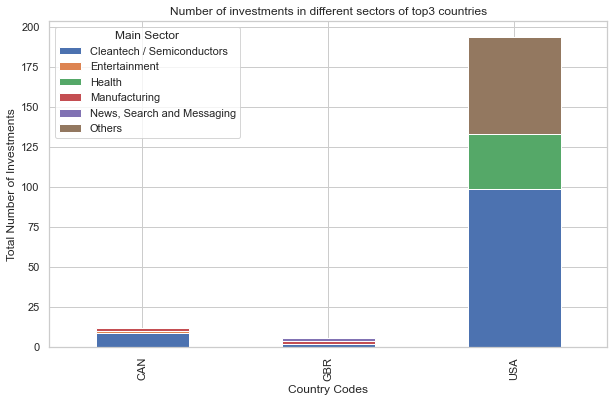

In [54]:
# Plotting the top 3 sectos of each country
pd.pivot_table(data=top3_sectors, values='raised_amount_usd', index='country_code', columns='Main Sector').plot(kind='bar', stacked = True, figsize = [10,6])
plt.title('Number of investments in different sectors of top3 countries')
plt.xlabel('Country Codes')
plt.ylabel('Total Number of Investments')
plt.show()